In [1]:
%load_ext autoreload
%autoreload 2
from palm_tools.processing import *

In [2]:
exp = Experiment(data_folder="/Users/hverdier/palm_tools_data/DATA_FOLDER",
    export_folder="/Users/hverdier/palm_tools_data/EXPORT_FOLDER")

In [3]:
# Indicate conditions in the index_df table of the Experiment
# This can be done automatically if you create a subclass of Experiment
exp.index_df["condition"] = "A"
exp.index_df.loc[exp.index_df.file.str.contains("B"),"condition"] = "B"

In [4]:
tp_loaded = TifPipeline.from_yaml("/Users/hverdier/Desktop/pipeline")

In [5]:
print(tp_loaded)

TIF Processing pipeline
-----------------------
Movie preprocessing steps :
1/1 	 Local percentile filtering (WindowPercentileFilter) :
		 percentile : 3.0
		 window_size : 100

-----------------------
Localizer :
	 Default Localizer (DefaultLocalizer) :
		 threshold_factor : 1.0

-----------------------
Localization processing steps :
- 1/1 	 Drift corrector (DriftCorrector) :

-----------------------
Tracker :
	 Trackpy Tracker (TrackpyTracker) :
		 max_diffusivity : 5.0




In [6]:
tp_default = TifPipeline.from_dict({
    "name":"default",
})
tp_background_filter = TifPipeline.from_dict({
    "name":"filter-background",
    "movie_preprocessors":[{"WindowPercentileFilter":{"percentile":10,"window_size":500}}]
})
tp_background_and_drift_corrector = TifPipeline.from_dict({
    "name":"filter-background-correct-drift",
    "movie_preprocessors":[{"WindowPercentileFilter":{"percentile":10,"window_size":500}}],
    "loc_processors":[{"DriftCorrector":{}}]
})

In [13]:
napari.Viewer()

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 0.0, 0.0), zoom=1.0, angles=(0.0, 0.0, 90.0), perspective=0, interactive=True), cursor=Cursor(position=(1, 1), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0, 2, 1), (0, 2, 1)), current_step=(0, 0), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertices=False, selection_box_drag=None, selection_box_final=None, transform_start=<napari.utils.transforms.transforms.Affine obj

In [15]:
tp_loaded.open_in_napari(Acquisition(tif_file=exp[0],experiment=exp,tif_pipeline=tp_loaded))

Adding widget for percentile
Adding widget for window_size
Adding widget for threshold_factor
Adding widget for max_diffusivity
Set Input Image ROI.tif
Set Input Image ROI.tif
{0: <Image layer 'ROI.tif' at 0x7f7de5368d30>}
Local percentile filtering is about to process
Adding layer 0 -> 1
Updating threshold_factor
1.0 -> 1.05
Updating threshold_factor
1.05 -> 1.1


{0: <Image layer 'ROI.tif' at 0x7f7de5368d30>, 1: <Image layer 'ROI.tif : Local percentile filtering' at 0x7f7de6e1dca0>}
[########################################] | 100% Completed |  2min 34.0s
Adding layer 1 -> 2


/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


{0: <Image layer 'ROI.tif' at 0x7f7de5368d30>, 1: <Image layer 'ROI.tif : Local percentile filtering' at 0x7f7de6e1dca0>, 2: <Points layer 'ROI.tif : Default Localizer' at 0x7f7de5a488e0>}


Adding layer 2 -> 3


/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [8]:
for tp in [tp_loaded, tp_default, tp_background_filter, tp_background_and_drift_corrector]:
    acq = Acquisition(tif_file=exp[0],experiment=exp,tif_pipeline=tp)
    tp.process(acq)

Process <palm_tools.data_structure.acquisition.Acquisition object at 0x7f7dff9f59a0>
Process <palm_tools.data_structure.acquisition.Acquisition object at 0x7f7dfc8d8700>
Process <palm_tools.data_structure.acquisition.Acquisition object at 0x7f7dff9f51c0>
Process <palm_tools.data_structure.acquisition.Acquisition object at 0x7f7dfc8d8700>


In [9]:
for tp in [tp_loaded, tp_default, tp_background_filter, tp_background_and_drift_corrector]:
    acq = Acquisition(tif_file=exp[0],experiment=exp,tif_pipeline=tp)
    print("%d localizations found with %s" % (acq.locs.shape[0],tp.name))

41964 localizations found with napari-default
44549 localizations found with default
46842 localizations found with filter-background
46842 localizations found with filter-background-correct-drift


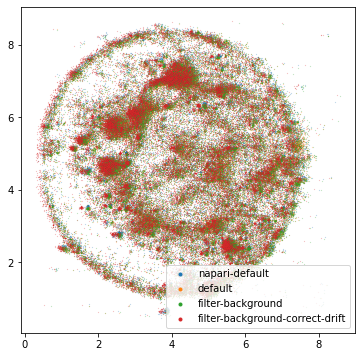

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
#ax.set_xlim((4,5))
#ax.set_ylim((4,5))
for tp in [tp_loaded, tp_default, tp_background_filter, tp_background_and_drift_corrector]:
    acq = Acquisition(tif_file=exp[0],experiment=exp,tif_pipeline=tp)
    ax.scatter(acq.locs.x,acq.locs.y,s=.01,label=tp.name)
plt.legend(markerscale=30)

In [17]:
acq.locs.head()

Unnamed: 0  frame         x         y     ratio     sigma  total_intensity  \
0           0      0  4.588579  2.914535  1.150151  4.709813           3675.0   
1           1      2  4.378553  5.337134  1.337073  4.784887           3878.0   
2           2      2  5.603706  2.842486  1.126498  5.019564           4630.0   
3           3      3  3.998898  4.726559  1.440329  4.305943           5833.0   
4           4      4  2.428991  4.296953  1.753569  4.835954           3938.0   

      t  n_detection  n_bin  n  
0  0.00            0      1  0  
1  0.06            1      1  1  
2  0.06            2      1  2  
3  0.09            3      1  1  
4  0.12            4      1  3

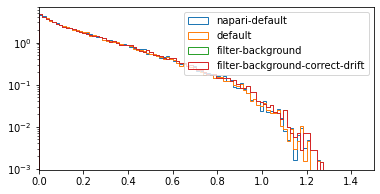

In [21]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
#ax.set_xlim((4,5))
#ax.set_ylim((4,5))
for tp in [tp_loaded, tp_default, tp_background_filter, tp_background_and_drift_corrector]:
    acq = Acquisition(tif_file=exp[0],experiment=exp,tif_pipeline=tp)
    ax.hist(np.log10(acq.locs.ratio),density=True,histtype="step",bins=100,label=tp.name,range=(0.,1.5))
plt.yscale("log")
plt.xlim((0,1.5))
plt.legend()